In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('./Software-Developer-Salary-Prediction-Web-App-With-Streamlit/survey_results_public.csv')
data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## Data Cleaning and Manipulation
- Let's start by having a look at the columns of our data

In [40]:
data.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

- Now from all the columns we have we will only use 5 columns to predict the salary
- Columns we will use are 'Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedComp'

In [41]:
# choose column we will use for prediction
data = data[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
# rename 'ConvertedCompYearly' to 'Salary'
data = data.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


- Let's have a look at the information of our new column

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       87973 non-null  object 
 1   EdLevel       87973 non-null  object 
 2   YearsCodePro  66136 non-null  object 
 3   Employment    87898 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


- Now let's check for missing values in our new data

In [43]:
# check for missng values
data.isnull().sum()

Country          1211
EdLevel          1211
YearsCodePro    23048
Employment       1286
Salary          41165
dtype: int64

-Inorder for our  model to predict, we should use our data that contains salary values. Threfore, we'll choose the data in which there are no any null values in the 'Salary' column

In [44]:
# select 'Salary' column with no null values
data = data[data['Salary'].notnull()]
data.isnull().sum()

Country           0
EdLevel           0
YearsCodePro    194
Employment       12
Salary            0
dtype: int64

- After we have selected the column with no null values for the 'Salary' column we still can see there are some msiing values in the 'YearsCodePro' and 'Employent' columns. We will drop the rows with null values

In [45]:
# drop rows with null values
data = data.dropna()
# check null values
data.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Employment    47813 non-null  object 
 4   Salary        47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


- Now, we'll only select values 'Employed full-time' columns in the 'Employment' column

In [47]:
data['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Retired',
       'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [48]:
# filter 'Employed full-time' values in the 'Employment' column
data = data[data['Employment'] == 'Employed, full-time']

# drop the 'Employment' column
data = data.drop('Employment', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


- Now let's have a look at the value counts for the 'Country' column

In [49]:
data['Country'].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Saint Lucia                                                 1
Monaco                                                      1
Guinea-Bissau                                               1
Barbados                                                    1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

- A the countries with only '1' vaue counts are of less use to our model we will come up with a solution

In [50]:
# function to the shorten the 'Country' column based on the unique values and count
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [51]:
# applying the shorten_categories function
country =  data['Country'].value_counts()
country_map = shorten_categories(country, 400)
data['Country'] = data['Country'].map(country_map)
data['Country'].value_counts()

Country
United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


## Data Visualization
- let's visualize our data using the boxplot to check for outliers

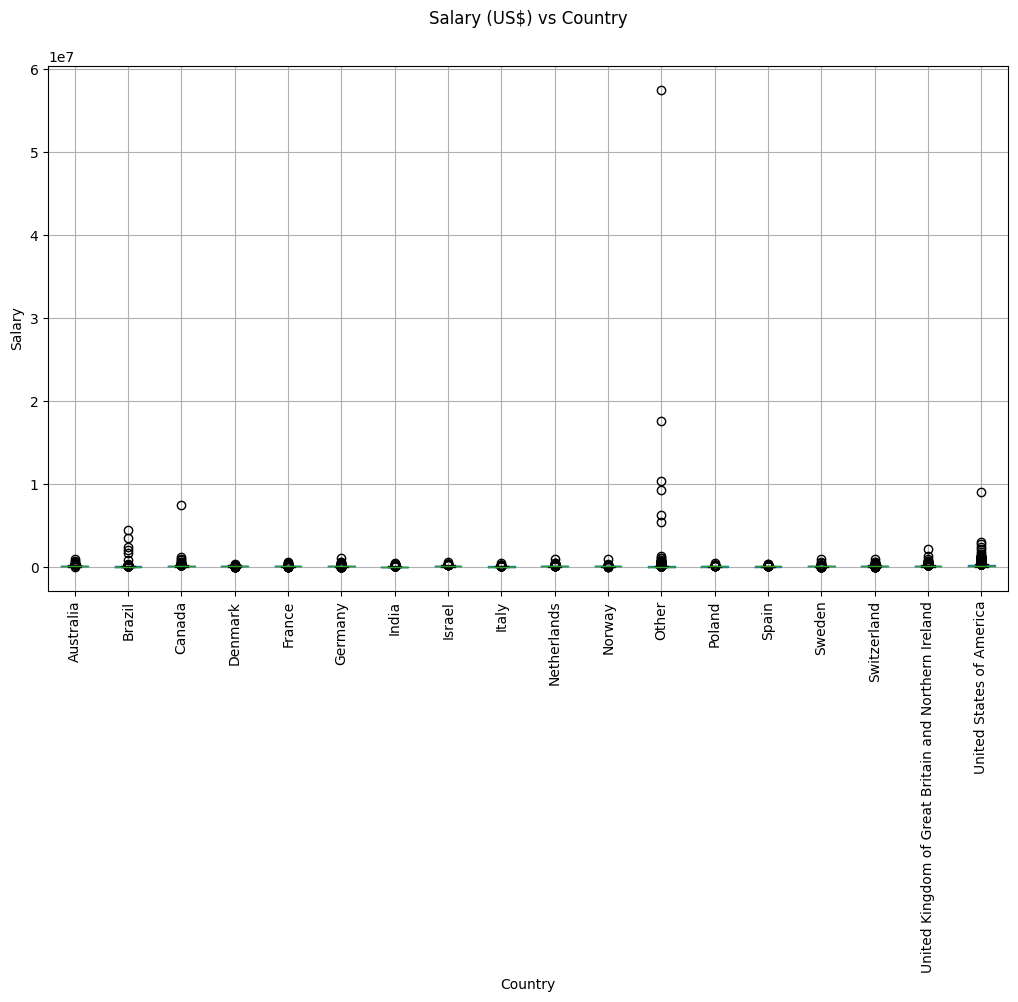

In [52]:
# create a boxplot
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

- Now, we'll filter the data with Salary in teh range of 10000 to 250000 and excluding the 'Other' category from the 'Country' column

In [53]:
data = data[(data['Salary'] >= 10000) & (data['Salary'] <= 250000) & (data['Country'] != 'Other')]

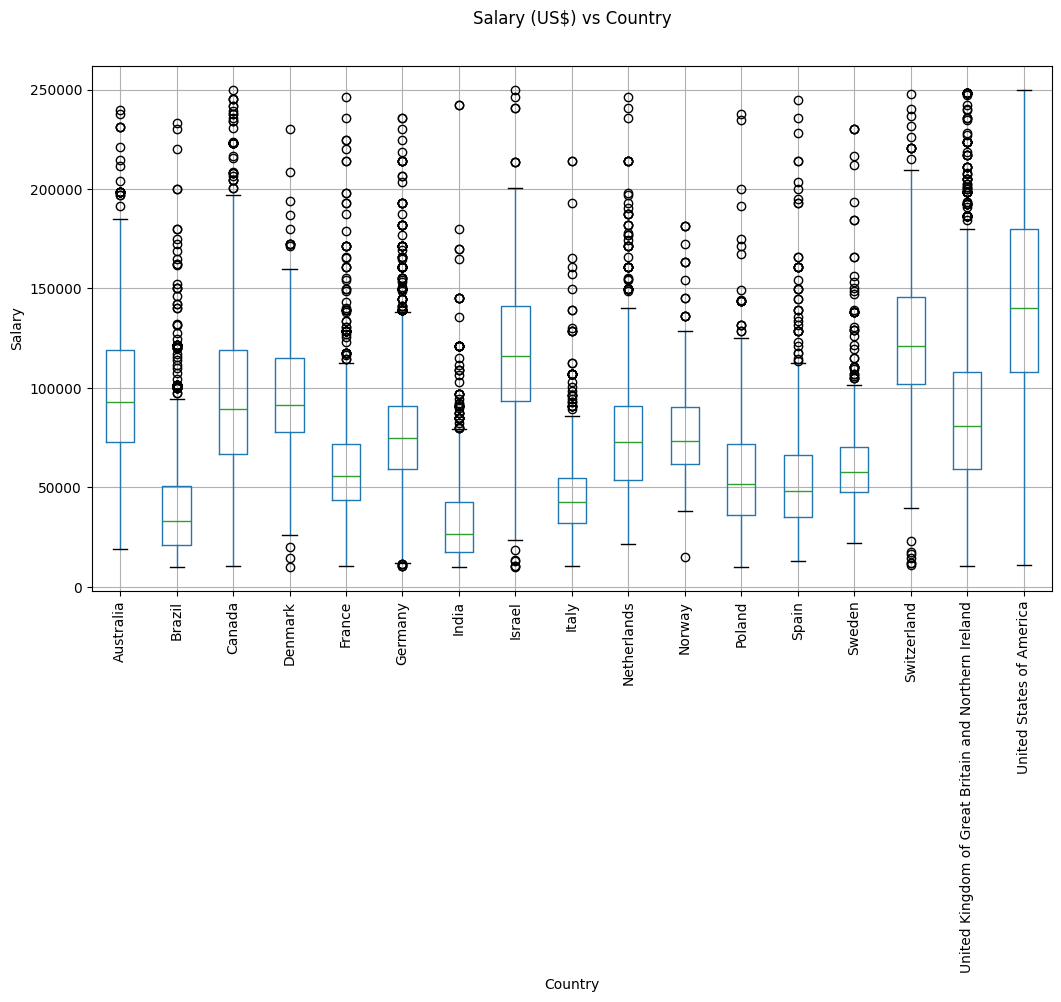

In [54]:
# boxplot after filtering
fig, ax = plt.subplots(1 ,1 ,figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

- Now, let's have a look at the unique values for the 'YearsCodePro' column

## Data Cleaning and Preprocessing

In [55]:
data['YearsCodePro'].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

- As you can see the 'YearsCodePro' column contains string and also there are some tesxts dispalyed as 'Less than 1 year' and 'More than 50 years' we will clean the 'YearsCodePro' column next

In [56]:
# function to clean the 'YearsCodePro' column
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

data['YearsCodePro'] = data['YearsCodePro'].apply(clean_experience)

- Now, let's have a look at the unique values for teh 'EdLevel' column

In [57]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

- Now, we will clean the 'EdLevel' column

In [58]:
# function to clean the 'EdLevel' column
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x or 'Associate degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

data['EdLevel'] = data['EdLevel'].apply(clean_education)

In [59]:
# unique values in 'EdLevel' colum after cleaning
data['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

- Now, let's convert teh categorical columns to numerical because our model accepts numerical values

In [76]:
data['EdLevel'].shape

(27716,)

In [60]:
# import necessary lirary
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
# label encode the 'EdLevel' column
data['EdLevel'] = le_education.fit_transform(data['EdLevel'])
data['EdLevel'].unique()

array([0, 1, 2, 3])

In [61]:
le_country = LabelEncoder()
# label encode the 'Country' column
data['Country'] = le_country.fit_transform(data['Country'])
data['Country'].unique()

array([16, 15,  0,  9,  5, 13,  4, 12,  1,  8,  2, 14,  6, 10,  3,  7, 11])

In [62]:
# save cleaned data
data.to_csv('./Software-Developer-Salary-Prediction-Web-App-With-Streamlit/cleaned_data.csv', index=False)

## Model Training
- Let's select our feature and target variables

In [63]:
X = data.drop('Salary', axis=1)
y = data['Salary']

# print shape of X and y
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (27716, 3)
Shape of y: (27716,)


In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27716 entries, 2 to 89170
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       27716 non-null  int64  
 1   EdLevel       27716 non-null  int64  
 2   YearsCodePro  27716 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 866.1 KB


- Before training we should scale our data. we'll scale our data using the StandardScaler from sklearn library

In [65]:
# set columns for our feature variable(X)
X.columns = ['Country', 'EdLevel', 'YearsCodePro']

### Find best model using GridSearchCV

In [66]:
# import GridSearchCV library and ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

# import algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_depth' : [None, 2,4,6,8,10,12]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.269278,{'fit_intercept': True}
1,lasso,0.269279,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.540268,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.567083,{'max_depth': 10}


- As you can see the best model to use is the RandomForestRegressor. So, we'll fit our data using the RandomForestRegressor algorithm

In [67]:
model = RandomForestRegressor()
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([166237.97236047, 147448.93318534, 112473.89630952, ...,
        34259.84547619,  23779.72860354,  75275.04447123])

- Now, let's have a look at our metrics

In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
error = np.sqrt(mse)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print(f"error: {error:.02f}")

Mean Squared Error:  1146548521.2282343
Mean Absolute Error:  24561.756864922914
error: 33860.72


- Now, let's try an example

In [69]:
# test data
X_test = np.array([["United States of America", 'Master’s degree', 15 ]])
X_test

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

- now, let's transform the inputs to their respective number format

In [70]:
# transform each value to numerical form
X_test[:, 0] = le_country.transform(X_test[:, 0])
X_test[:, 1] = le_education.transform(X_test[:, 1])
X_test = X_test.astype(float)
X_test

array([[16.,  2., 15.]])

- Now, let's predict the salary based on our new test data

In [71]:
# predict salary
y_pred = model.predict(X_test)
y_pred[0]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


176436.60196477096

## Save Model and Important Data

In [72]:
import pickle

# important data
imp_data = {'model': model, 'le_country': le_country, 'le_education': le_education}
# write on imp_data
with open('./Software-Developer-Salary-Prediction-Web-App-With-Streamlit/model.pkl', 'wb') as file:
  pickle.dump(imp_data, file)

- Now, let's read the saved file then predict using our previous data (X_test)

In [73]:
with open('./Software-Developer-Salary-Prediction-Web-App-With-Streamlit/model.pkl', 'rb') as file:
  imp_data = pickle.load(file)

model_loaded = imp_data['model']
le_country = imp_data['le_country']
le_education = imp_data['le_education']

In [74]:
# predict
y_pred = model_loaded.predict(X_test)
y_pred

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([176436.60196477])

- As you can see the loaded model prediction is the same as the first prediction we used on X_test before saving the model